## Подготовка нужных библиотек

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Подготовка нужных таблиц

In [49]:
pd.set_option('display.max_rows', 50)

Импорт нужных таблиц

Где df - лего наборы, p_themes - лицензия (есть или нет) у отдельных тем, sets - информация о айди темы набора и колличеством частей в нем

In [50]:
df = pd.read_csv('lego-analysis-master/datasets/lego_sets.csv')
p_themes = pd.read_csv('lego-analysis-master/datasets/parent_themes.csv')
sets = pd.read_csv('lego-analysis-master/datasets/sets.csv')

In [51]:
df.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [52]:
p_themes.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [53]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


## Задача 1: Подсчитать процентное соотношение лицензированных наборов по звездным войнам

In [54]:
mdf = df.merge(p_themes, left_on = 'parent_theme', right_on = 'name')  #соединяем df  и p_themes в оду таблицу
mdf = mdf.drop(columns=['name_y'])
mdf = mdf.rename(columns = {'name_x':'name'})

In [55]:
mdf = mdf.dropna(subset = 'set_num')

In [56]:
mdf.head() # получаем таблицу с нужными нам темами наборов и столбцом is_licensed

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


In [57]:
ans = mdf.groupby('is_licensed')['parent_theme'].value_counts()[True]

In [58]:
ans['Star Wars']/ans.sum()*100

51.653944020356235

In [59]:
others = ans.iloc[2:].sum()
ans = ans.iloc[:2] 
ans['others'] = others

In [60]:
ans

parent_theme
Star Wars       609
Super Heroes    242
others          328
Name: parent_theme, dtype: int64

<Axes: ylabel='Самые популярные наборы'>

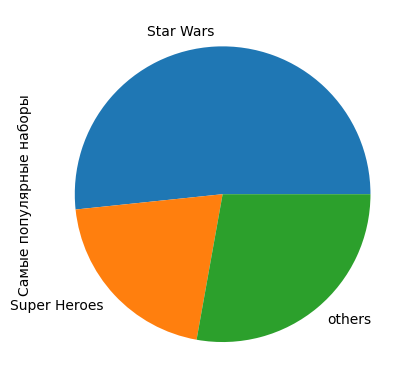

In [61]:
ans.plot(kind = 'pie', ylabel = 'Самые популярные наборы')

Ответ: 51.65 %

## Задача 2: Узнать, в каком году Звездные войны не были самой популярной темой

In [62]:
mdf['count'] = 1    #Создаю счетчик для удобства

lmdf = mdf[mdf['is_licensed'] == True]  # Отбираю лицензированые наборы

In [63]:
lmdf.head()

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed,count
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True,1
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True,1
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True,1
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True,1
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True,1


In [79]:
ans = lmdf.groupby(['year','parent_theme'])['count'].sum().reset_index() # колличество наборов по каждой теме за год

idx = ans.groupby('year')['count'].transform('max') == ans['count'] #выбираю самый популярную тему наборов года

In [80]:
ans = ans[idx]

In [83]:
filt = ans['parent_theme'] != "Star Wars"
ans.loc[filt, 'year']

82    2017
Name: year, dtype: int64

Ответ: В 2017

## Задача 3: Узнать в каком году было больше всего уникальных наборов

In [160]:
ans = mdf.groupby('year')['count'].sum()        #считаем колличество наборов за каждый год

max_unique_sets = ans[ans == ans.max()]         #Получаем ответ

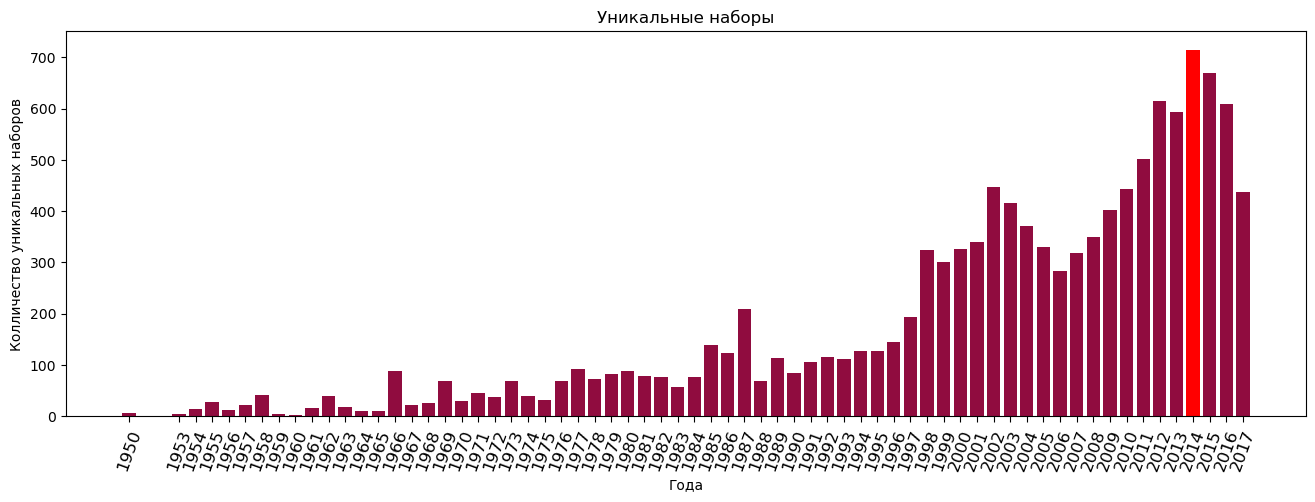

In [161]:
fig,ax = plt.subplots(figsize = (16,5))
ax.bar(ans.index,ans.values, color = '#900C3F')
ax.set_ylabel('Колличество уникальных наборов')
ax.set_xlabel('Года')
ax.set_title('Уникальные наборы')
ax.set_xticks(ans.index)
ax.tick_params(axis = 'x',rotation = 70, length = 4, labelsize = 12, pad = 4)
ax.bar(max_unique_sets.index,max_unique_sets.values, color = 'red')

plt.show()

In [162]:
ans[ans == ans.max()].index[0]

2014

Ответ: в 2014